# 介绍

## 背景介绍

目标是对一个电子商务网站进行漏斗分析。通常，网站有一条清晰的转化路径：例如，用户首先访问主页，然后搜索，选择商品并购买。在这些步骤的每一个环节，都会有一部分用户离开网站。导致转化的页面序列称为“漏斗”。

数据科学可以在优化漏斗方面产生巨大的影响。漏斗分析可以帮助我们了解用户在网站上何时以及何处放弃，这为用户行为提供了重要的洞察，也为改进用户体验提供了建议。此外，它还常常能发现系统中的错误。

一个电子商务网站的数据。该网站非常简单，只有4个页面：

1. 主页：当用户第一次访问该网站时，他们只能首先访问主页。
2. 搜索页面：从主页，用户可以执行搜索并进入搜索页面。
3. 支付页面：从搜索页面，如果用户点击了一个产品，她会进入支付页面，在那里她需要提供支付信息以购买该产品。
4. 确认页面：如果她决定购买，她将会进入确认页面。

公司CEO对销售量，尤其是来自新用户的销售量不太满意。因此，她请你调查转化漏斗中是否存在问题，或者你能否提出提高转化率的建议。她特别关注以下几点：

1. 漏斗转化率的全面分析：包括桌面端和移动端的转化率。
2. 产品团队的重点方向：为提升转化率提供建议，以及你发现的任何有助于提高转化率的因素。

## 数据

我们有5个表格可以下载（点击此处下载）。所有表格都仅涉及用户首次访问网站时的情况。这5个表格分别是：

1. **user_table** - 用户信息
   - `user_id`：用户的唯一标识，可用于与其他表中的`user_id`进行关联。
   - `date`：用户首次访问网站的日期。
   - `device`：用户使用的设备类型，可以是`mobile`（移动端）或`desktop`（桌面端）。
   - `sex`：用户的性别，`male`（男性）或`female`（女性）。

2. **home_page_table** - 访问主页的用户信息
   - `user_id`：用户的唯一标识。
   - `page`：页面名称，始终为`home_page`。

3. **search_page_table** - 访问搜索页面的用户信息
   - `user_id`：用户的唯一标识。
   - `page`：页面名称，始终为`search_page`。

4. **payment_page_table** - 访问支付页面的用户信息
   - `user_id`：用户的唯一标识。
   - `page`：页面名称，始终为`payment_page`。

5. **payment_confirmation_table** - 访问支付确认页面的用户信息，即完成购买的用户
   - `user_id`：用户的唯一标识。
   - `page`：页面名称，始终为`payment_confirmation_page`。

## 漏斗分析

漏斗分析（Funnel Analysis）是一种常用于分析用户行为流程中各阶段的转化率的工具，广泛应用于网站、应用程序和其他数字产品中。通过这种分析，可以清晰地看到在一个完整的用户行为路径中，用户在每个步骤的留存或流失情况，以此帮助理解用户在何处流失最多，以及如何改进产品来提高整体转化率。

漏斗分析的基本思路是将用户行为路径划分成一系列有序的阶段，每个阶段代表用户完成某个具体行为的过程。通过追踪用户在每一阶段的留存率或流失率，可以识别出可能的瓶颈或问题点。

**漏斗分析的应用场景包括：**

1. **电子商务**：追踪用户从浏览商品到最终购买的转化路径，识别影响购买决策的关键因素。
2. **应用软件**：分析用户从下载应用到成为活跃用户的过程，找出提高用户黏性的机会。
3. **在线教育**：观察学生从注册课程到完成学习的转化率，评估课程设计的有效性。
4. **网站注册**：分析用户从访问网站到完成注册的转化流程，优化注册界面和流程以提高用户转化率。

**漏斗分析的步骤：**

1. **定义转化目标**：确定漏斗的最终目标，如购买、注册、下载等。
2. **识别关键步骤**：根据用户达到转化目标的行为路径，识别出关键的行为步骤。
3. **数据收集**：通过各种工具收集用户在每个关键步骤的行为数据。
4. **分析与优化**：分析数据，识别在哪些步骤中用户流失较多，以及可能的原因。据此进行产品或服务的优化。

通过漏斗分析，企业和开发者不仅能发现并解决用户在使用产品过程中遇到的问题，还可以更精确地针对目标用户群体设计和优化产品功能，从而提高用户满意度和产品的整体性能。

# 导入数据集

In [45]:
# 导入必备的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

导入各个数据集。

In [3]:
user_data = pd.read_csv("./../dataset/05. Funnel_Analysis/user_table.csv")
user_data.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
home_data = pd.read_csv("./../dataset/05. Funnel_Analysis/home_page_table.csv")
home_data.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [6]:
payment_page_data = pd.read_csv("./../dataset/05. Funnel_Analysis/payment_page_table.csv")
payment_page_data.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [7]:
payment_confirmation_data = pd.read_csv("./../dataset/05. Funnel_Analysis/payment_confirmation_table.csv")
payment_confirmation_data.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [10]:
search_data = pd.read_csv("./../dataset/05. Funnel_Analysis/search_page_table.csv")
search_data.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


现在完成了对所有数据集的导入，接着是对数据集进行合并，获得一个合并之后的数据集。

In [13]:
full_data = pd.merge(left = user_data, right = home_data, how = 'left', on = 'user_id')
full_data = pd.merge(left = full_data, right = search_data, how = 'left', on = 'user_id', suffixes = ('_home', '_search'))
full_data = pd.merge(left = full_data, right = payment_page_data, how = 'left', on = 'user_id')
full_data = pd.merge(left = full_data, right = payment_confirmation_data, how = 'left', on = 'user_id', suffixes = ('_payment', '_confirmation'))

In [15]:
# 查看一下结果
full_data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


查看一下数据集的信息：

In [16]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   page_home          90400 non-null  object
 5   page_search        45200 non-null  object
 6   page_payment       6030 non-null   object
 7   page_confirmation  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 5.5+ MB


根据提供的数据集信息，现在我们有了一个包含所有用户在不同页面上的行为的数据集。这个数据集包含了以下列：

1. **user_id**: 用户的唯一标识符。
2. **date**: 用户访问的日期。
3. **device**: 用户使用的设备类型，如桌面或移动设备。
4. **sex**: 用户的性别。
5. **page_home**: 用户是否访问了主页。
6. **page_search**: 用户是否访问了搜索页面。
7. **page_payment**: 用户是否访问了支付页面。
8. **page_confirmation**: 用户是否到达了确认页面。

为了计算转化率，我们需要转换关于页面访问的数据（即把页面名称转换为是否访问的指标，1表示访问，0表示未访问），然后根据不同设备类型和性别分组，计算以下几个关键转化率：

- 从主页到搜索页面的转化率。
- 从搜索页面到支付页面的转化率。
- 从支付页面到确认页面的转化率。

这将帮助我们理解用户在哪个阶段流失最多，从而针对性地提出改进措施。让我们开始这一步的计算。

# 探索性分析

首先探索一下user_id的分布情况：

In [18]:
# 计算总用户数
total_users = full_data['user_id'].count()

# 计算唯一用户数
unique_users = full_data['user_id'].nunique()

# 输出结果
print("Total users:", total_users)
print("Unique users:", unique_users)

Total users: 90400
Unique users: 90400


可以发现所有的user_id都是唯一的，并不存在着重复的用户。

接着查看一下date的分布情况：

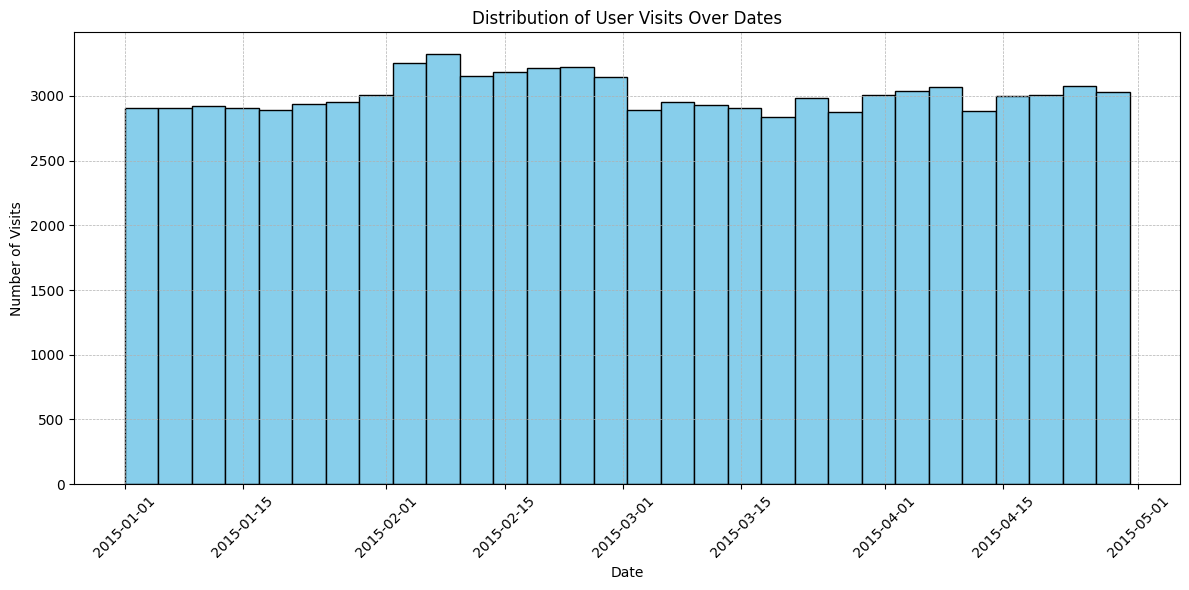

In [19]:
# Convert 'date' to datetime for better handling
full_data['date'] = pd.to_datetime(full_data['date'])

# Create a histogram to visualize the distribution of dates
plt.figure(figsize=(12, 6))
full_data['date'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of User Visits Over Dates')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

从可视化的结果来看，2015-01-01到2015-05-01之间的用户访问存在着一定的起伏，在205-02-01之后的两周存在着一定的上升，但是总体上并不存在着明显的访问变化。

然后是性别的分布：

In [20]:
sex_distribution = full_data['sex'].value_counts()

In [22]:
sex_distribution

sex
Male      45325
Female    45075
Name: count, dtype: int64

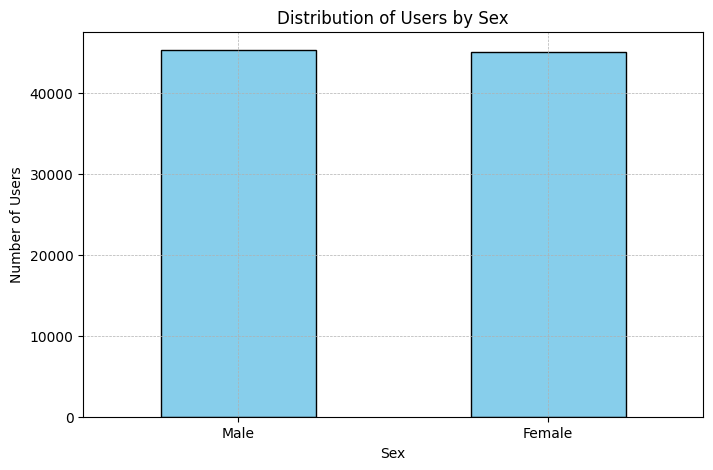

In [21]:
# Create a bar chart for the sex distribution
plt.figure(figsize=(8, 5))
sex_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Users by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

从可视化的结果来看，访问用户的性别在数量上基本一致。

In [23]:
device_distribution = full_data['device'].value_counts()
device_distribution

device
Desktop    60200
Mobile     30200
Name: count, dtype: int64

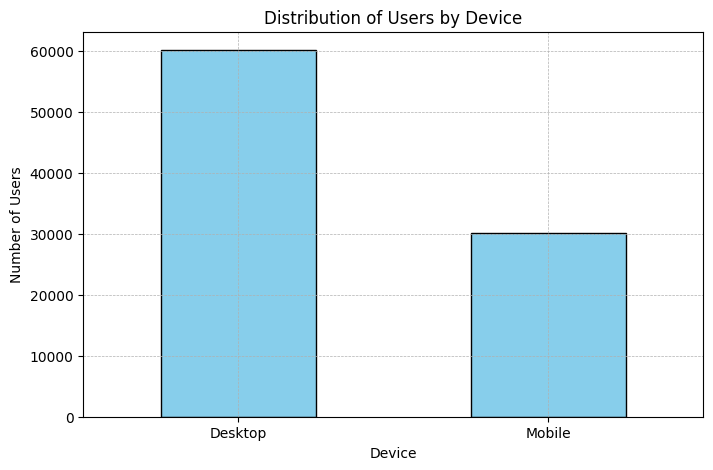

In [25]:
# Create a bar chart for the sex distribution
plt.figure(figsize=(8, 5))
device_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Users by Device')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

可以发现大部分的访问都是基于Desktop来进行的，而Mobile访问用户只占据了Desktop访问用户的一半左右。

# 数据分析

**漏斗图**

接着我们可以绘制漏斗图，来展示用户从一个页面到另一个页面，最终付费的变化情况：

In [29]:
funnel_stages = {
    "Home Page": full_data['page_home'].count(),
    "Search Page": full_data['page_search'].count(),
    "Payment Page": full_data['page_payment'].count(),
    "Confirmation Page": full_data['page_confirmation'].count()
}

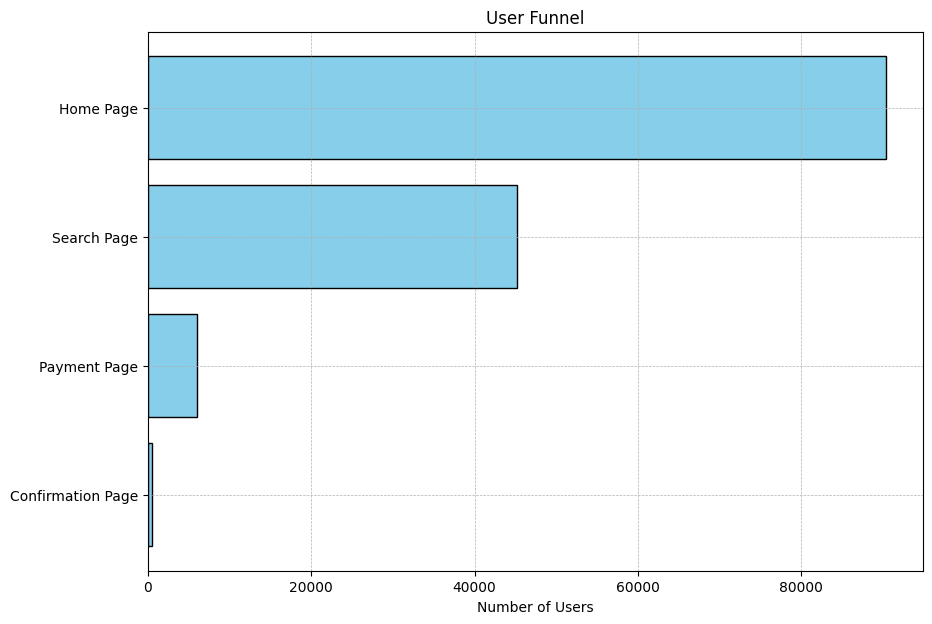

In [30]:
# Create a funnel plot
plt.figure(figsize=(10, 7))
plt.barh(list(funnel_stages.keys()), list(funnel_stages.values()), color='skyblue', edgecolor='black')
plt.xlabel('Number of Users')
plt.title('User Funnel')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().invert_yaxis()  # Invert y axis for the funnel effect
plt.show()

可以尝试更加美观的做法：

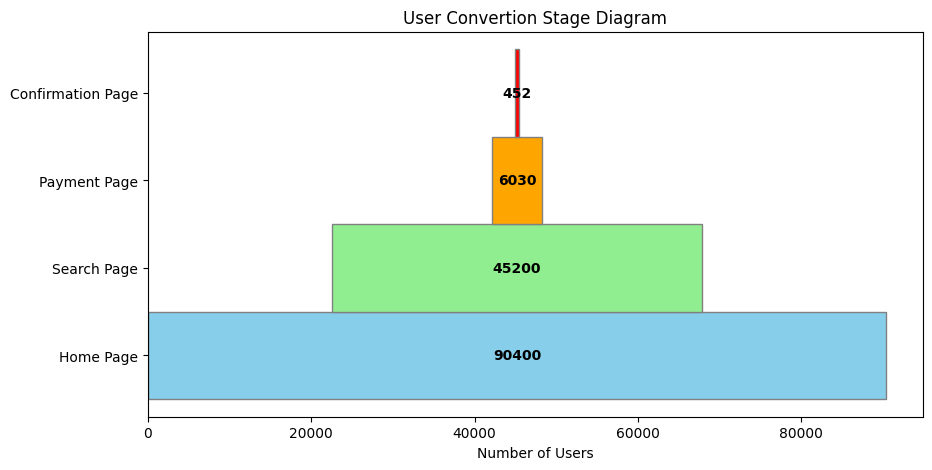

In [33]:
# 为了制作漏斗图效果，我们需要计算每个阶段的宽度
height = 1  # 每个条形的高度
levels = list(funnel_stages.values())
colors = ['skyblue', 'lightgreen', 'orange', 'red']  # 不同阶段使用不同颜色
labels = list(funnel_stages.keys())
y_pos = range(len(levels), 0, -1)  # y轴位置

fig, ax = plt.subplots(figsize=(10, 5))

# 绘制漏斗的每一层
for i in range(len(levels)):
    x_range = max(levels) / 2 - levels[i] / 2  # 计算每个条形的水平起始位置
    ax.barh(y_pos[i], levels[i], height=height, left=x_range, color=colors[i], edgecolor='gray')
    ax.text(x_range + levels[i] / 2, y_pos[i], f'{levels[i]}', va='center', ha='center', color='black', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel('Number of Users')
ax.invert_yaxis()  # 从上到下绘制
ax.set_title('User Convertion Stage Diagram')
plt.show()

将其倒过来，得到如下所示的可视化结果：

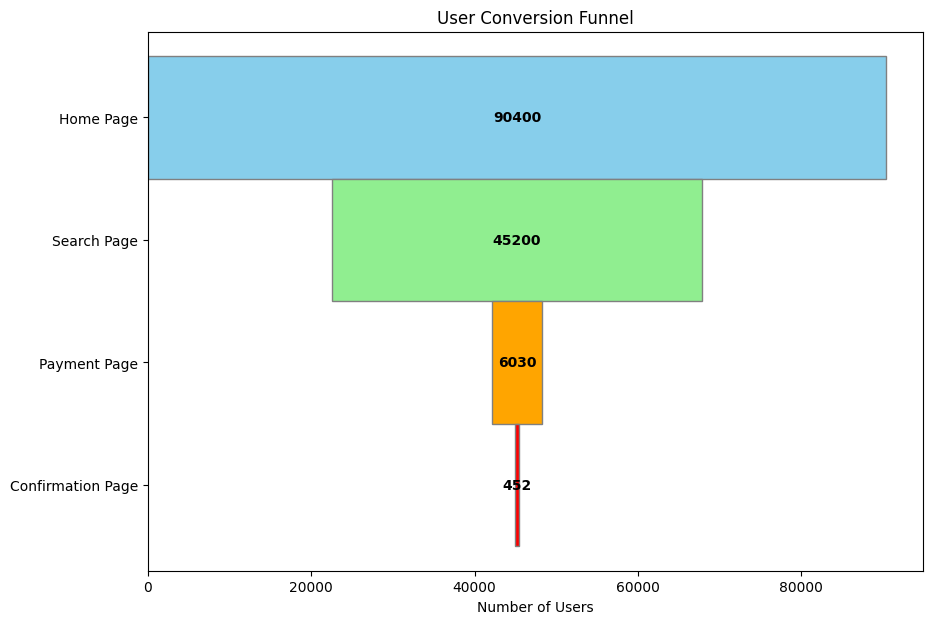

In [35]:
# Define the heights and colors for each stage
height = 1  # 每个条形的高度
levels = list(funnel_stages.values())
colors = ['skyblue', 'lightgreen', 'orange', 'red']  # 不同阶段使用不同颜色
labels = list(funnel_stages.keys())
y_pos = range(len(levels), 0, -1)  # y轴位置

fig, ax = plt.subplots(figsize=(10, 7))

# 绘制漏斗的每一层
for i in range(len(levels)):
    x_range = max(levels) / 2 - levels[i] / 2  # 计算每个条形的水平起始位置
    ax.barh(y_pos[i], levels[i], height=height, left=x_range, color=colors[i], edgecolor='gray')
    ax.text(x_range + levels[i] / 2, y_pos[i], f'{levels[i]}', va='center', ha='center', color='black', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel('Number of Users')
ax.set_title('User Conversion Funnel')
plt.show()

这个漏斗图清楚地展示了用户从主页开始，经过搜索页面和支付页面，最终到达确认页面的转化过程。下面是对图中显示的数据的分析：

1. **主页（Home Page）**:有 90,400 个用户访问了主页，这是漏斗的最上端，也是用户数量最多的阶段。

2. **搜索页面（Search Page）**:用户数减少到 45,200，与主页相比，大约有 50% 的用户从主页转到了搜索页面。这表明大约一半的访问主页的用户进一步进行了搜索操作。

3. **支付页面（Payment Page）**:从搜索页面到支付页面的转化显著下降，只有 6,030 个用户到达了支付页面。这表明在搜索到实际决定进行支付的过程中，有很大比例的用户流失。

4. **确认页面（Confirmation Page）**:最终只有 452 个用户完成了购买，从支付页面到确认页面的转化率也显示出进一步的下降。这可能表明支付过程中存在用户体验问题或者用户在最后一步决定放弃购买。

**用户行为分析**

首先需要计算转换率，由于需要反复使用，所以创建一个转换率计算函数：

In [40]:
def conversion_rate(df):
    """ function to calculate conversion rates for home, search and payment page"""
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates

接着计算整体上的转换率：

In [42]:
rates = conversion_rate(full_data)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': rates}
overall_conv = pd.DataFrame(maps, columns=['Page', 'Conversion Rate'])

In [43]:
overall_conv

,Page,Conversion Rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


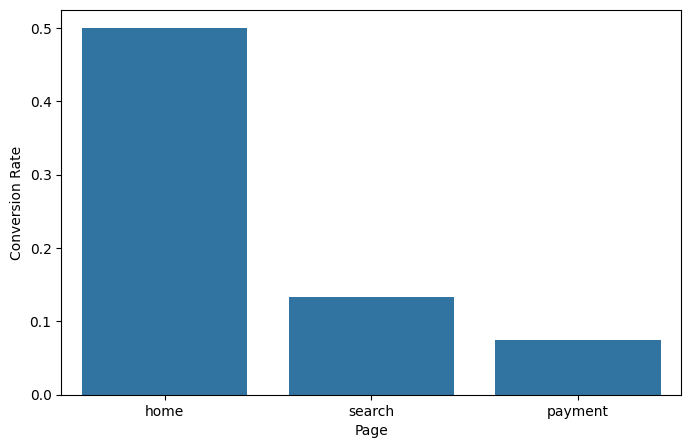

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=overall_conv, ax=ax)
plt.show()

接着查看其他特征变量中的转换率情况：

In [49]:
print(full_data['device'].unique())

['Desktop' 'Mobile']


In [51]:
desk_rates = conversion_rate(full_data[full_data['device'] == 'Desktop'])
mobile_rates = conversion_rate(full_data[full_data['device'] == 'Mobile'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Desktop', 'Mobile'))
print('-' * 40)
for name, desk_rate, mobile_rate in zip(names, desk_rates, mobile_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, desk_rate, mobile_rate))

   Page    |  Desktop   |   Mobile  
----------------------------------------
home       |   0.500000 |   0.500000
search     |   0.100000 |   0.200000
payment    |   0.049834 |   0.100000


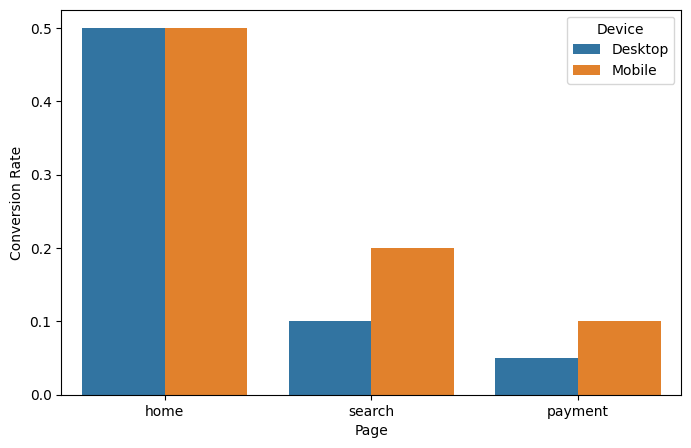

In [52]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desk_rates + mobile_rates}
device_conv = pd.DataFrame(maps, columns=['Page', 'Device', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=device_conv, ax=ax, hue='Device')
plt.show()

这个可视化图表展示了不同设备（桌面和移动设备）用户在电子商务网站的三个关键转化阶段的表现。具体而言，它追踪了用户从主页访问到搜索页面、从搜索页面到支付页面，以及从支付页面到确认页面的转化率。

在分析用户在桌面和移动设备上的转化率时，我们发现了一些显著的差异。首先，无论是桌面还是移动设备，用户从主页到搜索页面的转化率都保持在50%，这表明用户在两种设备上开始购物旅程的概率是相同的。然而，当用户从搜索页面继续到支付页面时，移动设备的转化率（20%）是桌面设备（10%）的两倍。这可能意味着移动设备提供了更流畅的购物体验，或者移动用户更倾向于进行实际购买。

进一步地，当用户到达支付页面并尝试完成购买时，移动设备的转化率（10%）再次高于桌面设备（4.9834%）。这进一步强调了移动平台在处理交易的最后阶段可能提供了更优质的用户体验。

这些数据揭示了移动设备在用户购买过程中的优势，同时也指出了桌面设备在转化率上的不足。为了优化用户体验并提高转化率，桌面平台可能需要考虑如何改进搜索结果的相关性，提供更多的决策支持信息，以及简化支付流程。同时，尽管移动设备的转化率较高，但仍有空间通过减少页面加载时间、简化表单填写步骤或增加支付方式的多样性来进一步提升用户体验。

总的来说，这些分析提供了宝贵的见解，指导我们如何根据不同设备上用户的行为特点来优化网站设计，以增强整体的用户体验并提高转化率。


同样的，我们可以计算性别因素带来的影响。

In [56]:
print(full_data['sex'].unique())

['Female' 'Male']


In [58]:
male_rates = conversion_rate(full_data[full_data['sex'] == 'Male'])
female_rates = conversion_rate(full_data[full_data['sex'] == 'Female'])
names = ['home', 'search', 'payment']
print('{0:^10s} | {1:^10s} | {2:^10s}'.format('Page', 'Male', 'Female'))
print('-' * 40)
for name, male_rate, female_rate in zip(names, male_rates, female_rates):
    print('{0:10s} | {1:10.6f} | {2:10.6f}'.format(name, male_rate, female_rate))

   Page    |    Male    |   Female  
----------------------------------------
home       |   0.496944 |   0.503073
search     |   0.130083 |   0.136708
payment    |   0.072014 |   0.077742


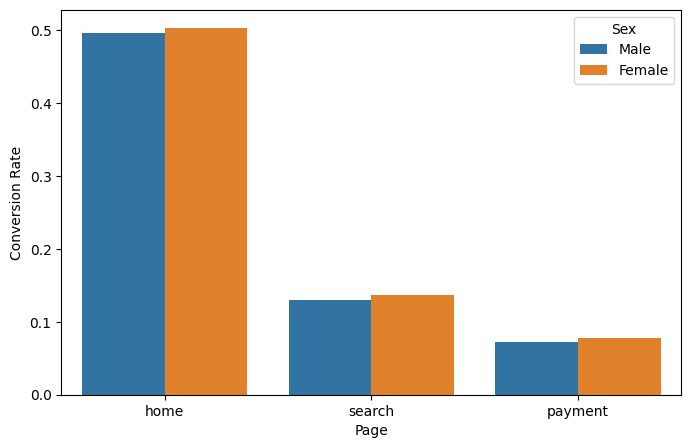

In [59]:
# Visualization
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'], 
        'Conversion Rate': male_rates + female_rates}
sex_conv = pd.DataFrame(maps, columns=['Page', 'Sex', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=sex_conv, ax=ax, hue='Sex')
plt.show()

在分析用户从主页到搜索页面的转化率时，我们发现男性和女性用户的转化率非常接近。男性的转化率约为49.69%，而女性的转化率为50.31%。这一阶段的微小差异表明，无论是男性还是女性用户，都有大约一半的概率会从主页进一步访问搜索页面。这可能意味着主页的设计对两性都具有相似的吸引力和有效性。

当用户从搜索页面继续到支付页面时，我们观察到女性的转化率略高于男性。男性的转化率约为13.01%，而女性的转化率为13.67%。虽然这一差异不大，但它可能反映出在选择商品或决定支付时，女性用户可能稍显果断，或者网站在吸引女性用户方面可能稍具优势。

在决定最终购买并完成支付的最后阶段，女性的转化率同样略高于男性。男性的转化率约为7.20%，而女性的转化率为7.77%。这一阶段的性别差异进一步加强了从搜索到支付阶段的观察结果，表明女性在购买决策上可能更为坚定，或是网站在处理女性用户的支付流程上可能更为顺畅。

尽管女性的转化率在每个阶段都略高于男性，但这些差异确实非常细微。例如，从搜索页面到支付页面的转化率差异约为0.66%，而从支付页面到确认页面的转化率差异约为0.57%。这种微小的差异虽然在统计上可能是可观察到的，但在实际应用中可能并不显著，尤其是在商业决策和策略调整方面。

这种情况可能意味着性别对购买决策的影响有限，在这个网站上，性别可能不是影响用户从搜索到购买行为的主要因素。这表明网站可能已经相对均衡地服务于男性和女性用户，无需针对性别进行大幅度的策略调整。然而，这些数据仍为网站提供了宝贵的见解，有助于进一步优化用户体验，以增强整体的转化率。